# Apa itu Convex Hull?

Convex hull adalah poligon cembung terkecil yang memuat sekumpulan titik tertentu. Ini adalah konsep yang berguna dalam geometri komputasional dan memiliki aplikasi dalam berbagai bidang seperti grafik komputer, pemrosesan gambar, dan deteksi tabrakan. Poligon cembung adalah poligon yang semua sudut dalamnya kurang dari 180 derajat. Selubung cembung dapat dibuat untuk kumpulan titik mana pun, apa pun susunannya. Jadi Convex Hull merupakan poligon cembung terkecil yang memuat sekumpulan titik tertentu.

# Bagaimana cara menemukan kulit cembung dari sekumpulan titik?

Ada beberapa algoritma untuk menemukan lambung cembung dari sekumpulan titik, seperti Brute Force, pemindaian Graham, pawai Jarvis, dan QuickHull.

# Apa saja aplikasi Convex Hull?

Convex hull memiliki banyak aplikasi dalam grafik komputer, geometri komputasi, dan bidang lainnya. Convex hull dapat digunakan untuk:

- Deteksi tabrakan
- Pengolahan gambar
- Perencanaan gerak
- Pemodelan medan

# Bagaimana Anda menghitung luas lambung cembung?

Area lambung cembung dapat dihitung dengan menggunakan rumus tali sepatu.

$$
\text{Area} = \frac{1}{2} \left| \sum_{i=1}^{n-1} (x_i y_{i+1} - y_i x_{i+1}) + (x_n y_1 - y_n x_1) \right|
$$


# Brute Force Convex Hull Algorithm

## Step Algorithm
1. Ambil semua titik yang diberikan sebagai input.
2. Iterasi semua pasangan titik $ (P_1, P_2) $ dalam himpunan titik.
   - Pilih setiap kombinasi $ (P_1, P_2) $ dari himpunan titik.
3. Periksa apakah semua titik lainnya berada di satu sisi garis $ (P_1, P_2) $:
   - Hitung **Cross Product** menggunakan rumus:
    $$
    \text{CP}(O, A, B) = (A_x - O_x) \cdot (B_y - O_y) - (A_y - O_y) \cdot (B_x - O_x)
    $$
     di mana $ O $ adalah titik referensi, $ A $ dan $ B $ adalah titik lainnya.
   - Jika semua titik ada di satu sisi (kiri atau kanan), garis ini adalah bagian dari Convex Hull.
4. Simpan titik-titik $ (P_1, P_2) $ yang membentuk garis bagian dari Convex Hull.
5. Ulangi langkah 2-4 untuk semua pasangan titik.
6. Hasilkan daftar titik yang membentuk Convex Hull dalam urutan tertentu.
7. (Opsional) Plot hasilnya jika diperlukan.


# Convex Hull Pendekatan Brute Force

In [34]:
def CrossProduct(O, A, B):
    return (A[0] - O[0]) * (B[1] - O[1]) - (A[1] - O[1]) * (B[0] - O[0])
def IsHullEdge(P1, P2, Points):
    Pos, Neg = False, False
    for P in Points:
        if P == P1 or P == P2:
            continue
        Cross = CrossProduct(P1, P2, P)
        if Cross > 0: Pos = True
        elif Cross < 0: Neg = True
        if Pos and Neg:
            return False
    print(f"  {P1} -> {P2} bagian dari Convex Hull")
    return True
def BruteForceConvexHull(Points):
    Hull = set()
    for i in range(len(Points)):
        for j in range(i + 1, len(Points)):
            if IsHullEdge(Points[i], Points[j], Points):
                Hull.add(Points[i])
                Hull.add(Points[j])
    return sorted(Hull)

### Contoh Implementasi

In [25]:
Points = [(0, 3), (1, 1), (2, 2), (4, 4), (0, 0), (1, 2), (3, 1), (3, 3)]
HullPoints = BruteForceConvexHull(Points)
print("Titik Convex Hull:")
for P in HullPoints:
    print(P)

  (0, 3) -> (4, 4) bagian dari Convex Hull
  (0, 3) -> (0, 0) bagian dari Convex Hull
  (4, 4) -> (3, 1) bagian dari Convex Hull
  (0, 0) -> (3, 1) bagian dari Convex Hull
Titik Convex Hull:
(0, 0)
(0, 3)
(3, 1)
(4, 4)


### Ilustrasi Convex Hull

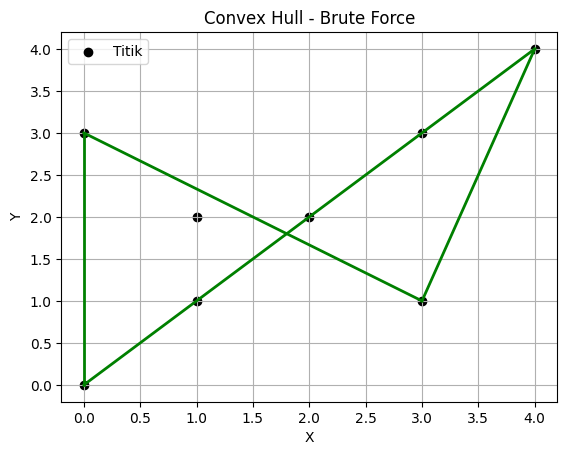

In [35]:
import matplotlib.pyplot as plt
def PlotConvexHull(Points, HullPoints):
    plt.scatter(*zip(*Points), color='black', label='Titik')
    for i in range(len(HullPoints)):
        P1, P2 = HullPoints[i], HullPoints[(i + 1) % len(HullPoints)]
        plt.plot([P1[0], P2[0]], [P1[1], P2[1]], 'g-', linewidth=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Convex Hull - Brute Force')
    plt.grid()
    plt.show()
PlotConvexHull(Points, HullPoints)

#Analisis kompleksitas
1. Memeriksa semua pasangan titik
  - Jumlah pasangan titik adalah $C(n,2) = n(n-1)/2$
  - Ini menghasilkan kompleksitas $O(n²)$
2. Memeriksa semua titik lain terhadap setiap pasangan
  - Setiap pasangan $(P1, P2)$ diuji terhadap $(n - 2)$ titik lainnya
  - Kompleksitas pengecekan: $O(n)$
3. Total Kompleksitas
  - Karena ada $O(n²)$ pasangan, dan setiap pasangan diuji dalam $O(n$) waktu, maka:
  $$O(n²) * O(n) = O(n³)$$

#Kesimpulan:
1. Kompleksitas waktu: $O(𝑛^3)$ (cubic time complexity)
2. Tidak optimal untuk jumlah titik besar, lebih baik menggunakan algoritma seperti Graham’s Scan $O(N*log N)$ atau QuickHull $O(N*log N)$ untuk efisiensi lebih baik.

# Perbandingan kompleksitas waktu dengan algoritma lainnya
| Convex Hull Algorithm               | Time Complexity                |
|-------------------------------------|--------------------------------|
| Divide and Conquer Algorithm       | $O(N*log N)$                     |
| Jarvis’ Algorithm (Wrapping)       | $O(N^2$)                          |
| Graham Scan                        | $O(N*log N)$                     |
| Monotone Chain Algorithm           | $O(N*log N)$                     |
| Quickhull Algorithm                | $O(N*log N$) (Base), $O(N^2$) (Worst) |